**초기세팅**

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 중지 및 경고 무시
import warnings 
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('datasets/survey2017/schema.csv')
mcq = pd.read_csv('datasets/survey2017/multipleChoiceResponses.csv',
                 encoding="ISO-8859-1", low_memory=False)

### Q7. 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [3]:
job_features = [
    x for x in mcq.columns if x.find(
    'JobSkillImportance') != -1
    and x.find('JobSkillImportanceOther') ==-1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [4]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a
    
jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [5]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


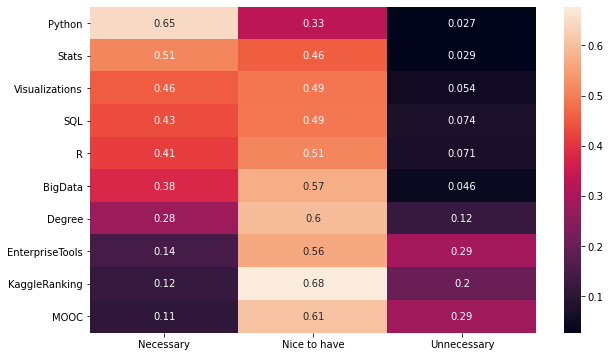

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary",
                           ascending=False), annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

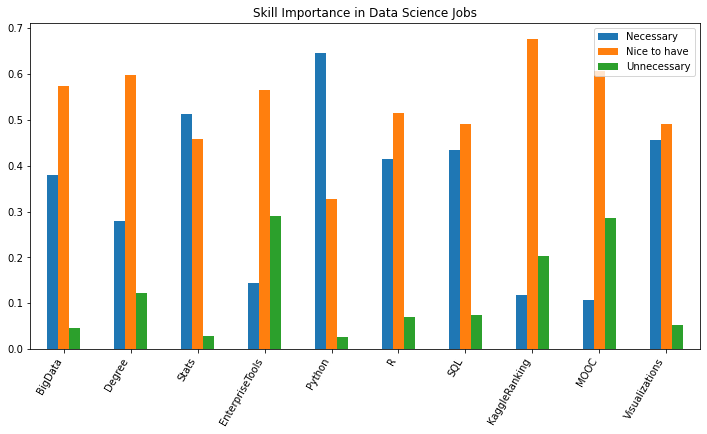

In [7]:
jdf.plot(kind='bar', figsize=(12,6),
        title="Skill Importance in Data Science Jobs")
plt.xticks(rotation=60, ha='right')

### Q8. 데이터 과학자의 평균 급여는 얼마나 될까?

In [8]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [9]:
mcq['CompensationAmount']= mcq[
    'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount']= mcq[
    'CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져옴
rates = pd.read_csv('datasets/survey2017/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1, inplace=True)

salary = mcq[
    ['CompensationAmount','CompensationCurrency', 'GenderSelect',
    'Country','CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on='CompensationCurrency',
                        right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
    salary['CompensationAmount']) * salary['exchangeRate']

salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [10]:
print('Maximum Salary is USD $',
     salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
     salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
     salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

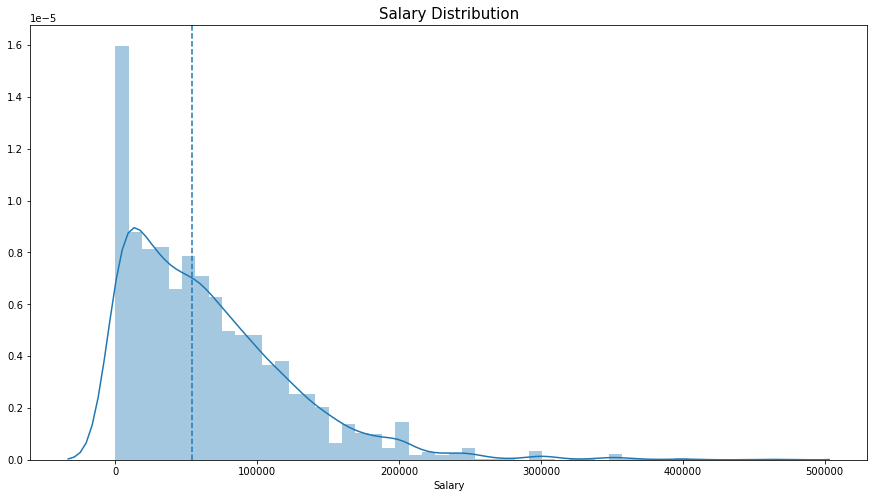

In [11]:
plt.subplots(figsize=(15,8))
salary = salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(),linestyle='dashed')
plt.title("Salary Distribution", size=15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

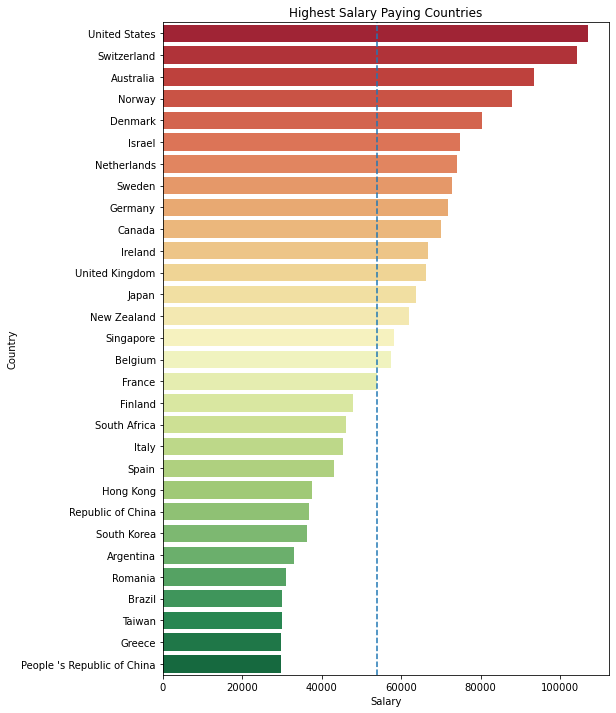

In [12]:
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby(
    'Country')['Salary'].median().sort_values(
    ascending=False)[:30].to_frame()

sns.barplot('Salary', sal_coun.index, data =sal_coun, palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title("Highest Salary Paying Countries")

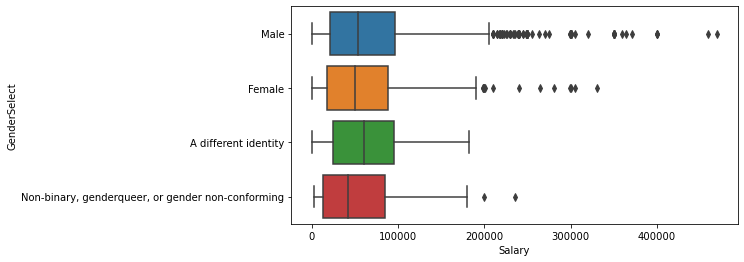

In [13]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)

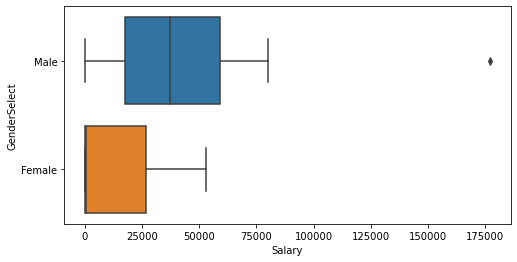

In [14]:
salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

In [15]:
salary_korea.shape

(26, 8)

In [16]:
salary_korea[salary_korea['GenderSelect']=='Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [17]:
salary_korea_male = salary_korea[
        salary_korea['GenderSelect'] =='Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [18]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


### Q9. 개인프로젝트나 학습용 데이터를 어디에서 얻나요?

In [19]:
mcq['PublicDatasetsSelect'] = mcq[
    'PublicDatasetsSelect'].astype('str').apply(
        lambda x: x.split(','))

In [20]:
q = mcq.apply(
        lambda x: pd.Series(x['PublicDatasetsSelect']),
        axis=1).stack().reset_index(level=1, drop=True)

q.name = 'courses'

In [21]:
q = q[q != 'nan'].value_counts()

In [22]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


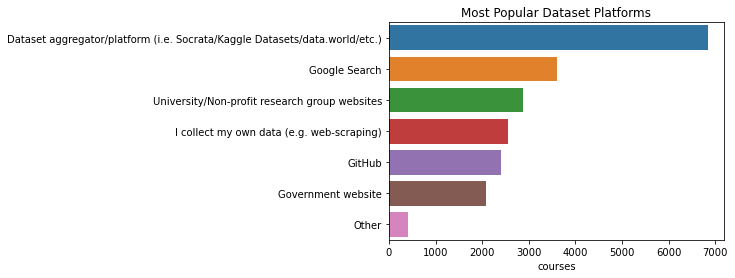

In [23]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

*주관식 응답을 읽어옴*

In [24]:
ff = pd.read_csv('datasets/survey2017/freeformResponses.csv',
                    encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

*설문 내용과 누구에게 물어봤는지 찾아봄*

In [25]:
qc = question.loc[question[
        'Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

*개인 프로젝트에서 공개된 데이터 셋을 다루는데 가장 어려운 점은 무엇일까?*

In [26]:
ppcff = ff[
        'PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name ='응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
Data cleaning,10
dirty data,10
Size,9
-,9


### Q10. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은 ?

In [27]:
time_features=[
    x for x in mcq.columns if x.find('Time') != -1][4:10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



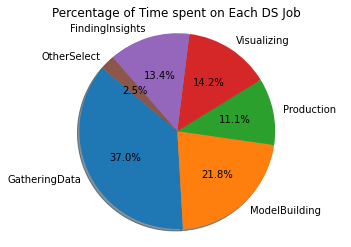

In [28]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()
    
tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf,labels=tdf.index,
       autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time spent on Each DS Job")
plt.show()

### Q11. 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까요?

*설문 내용과 누구에게 물어봤는지를 찾아봄*

In [29]:
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [30]:
job_factors = [
    x for x in mcq.columns if x.find('JobFactor') != -1]

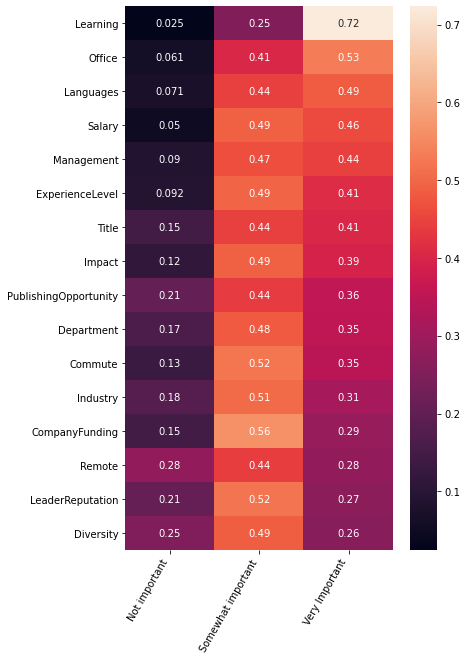

In [31]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a
    
jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60,ha='right')

sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True)

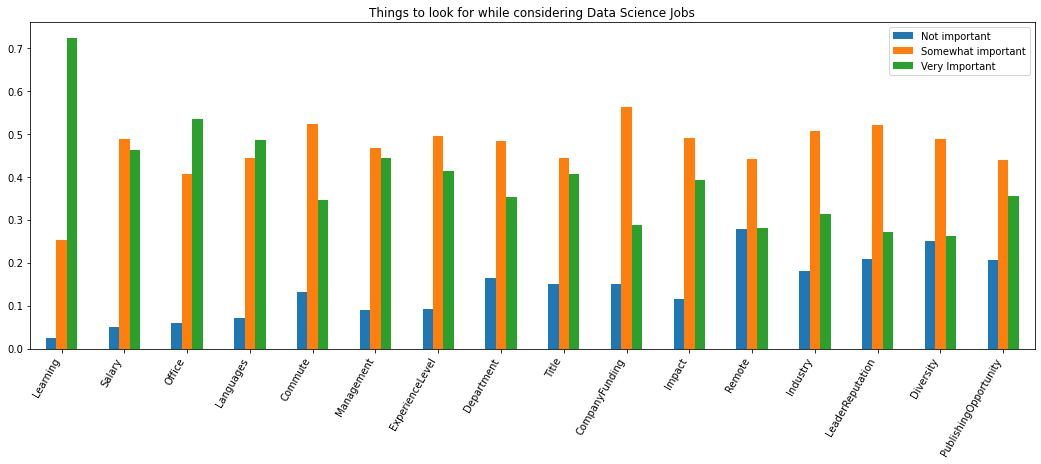

In [32]:
jfdf.plot(kind='bar', figsize=(18,6),
         title = "Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

### Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까요?

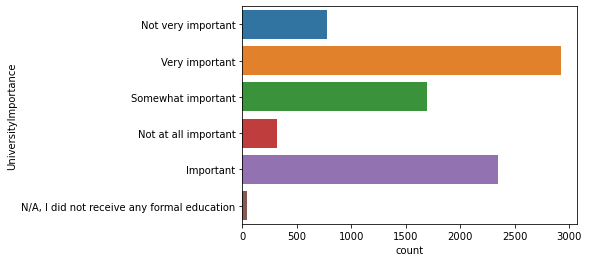

In [33]:
sns.countplot(y='UniversityImportance', data=mcq)

In [34]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
    mcq[(mcq['Age'].notnull()) &
       (mcq['UniversityImportance'] == uni)]['Age'])
    
group_labels = top_uni.index

fig = fig_fact.create_distplot(
    top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')

### Q13. 어디에서 부터 데이터 사이언스를 시작해야 할까요?

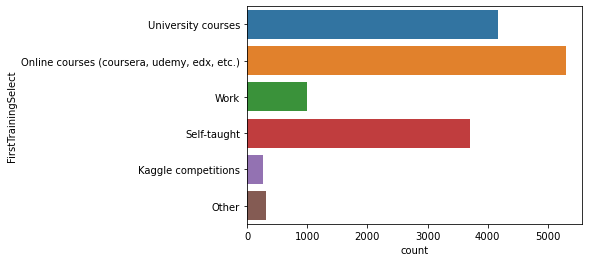

In [35]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

### Q14. 데이터 사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

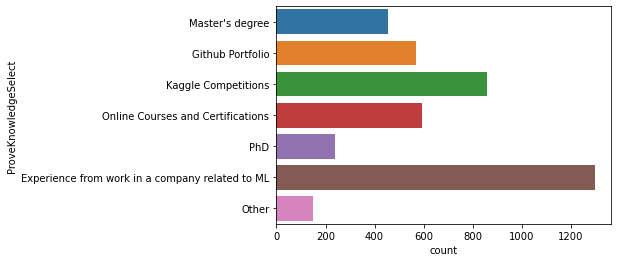

In [36]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

### Q15. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

In [37]:
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [38]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

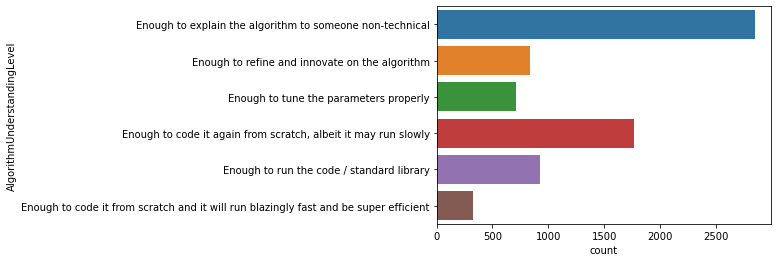

In [39]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

### Q16. 어디에서 일을 찾아야 할까요?

In [40]:
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


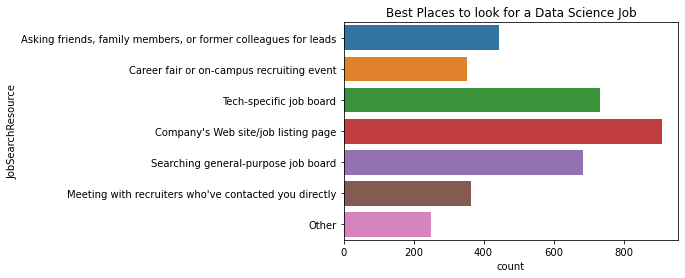

In [41]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource',data=mcq)

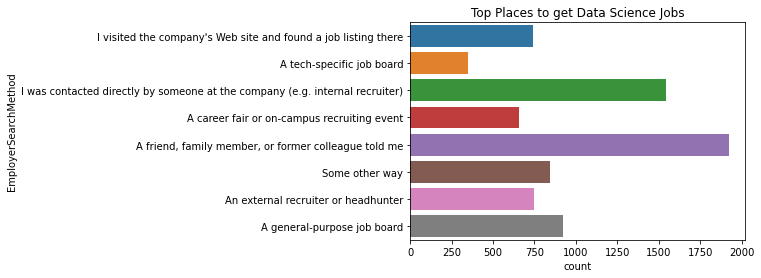

In [42]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod',data=mcq)

#### 한국사람들은 어떨까?

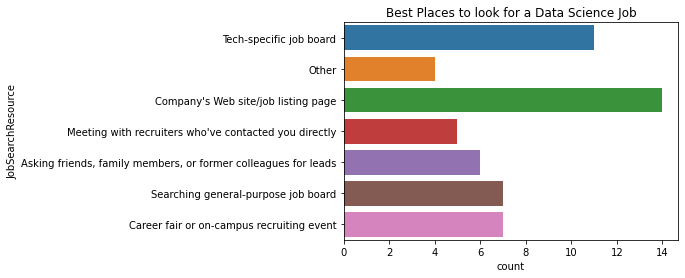

In [43]:
korea = mcq.loc[(mcq['Country']=='South Korea')]

plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource',data=korea)

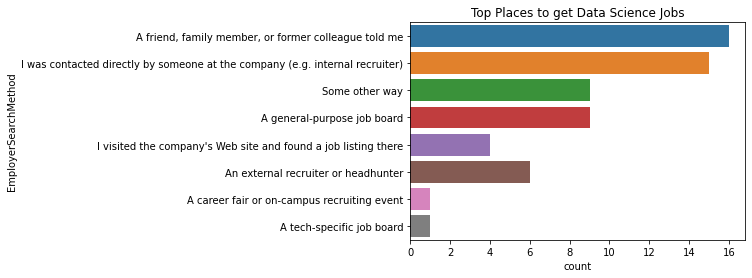

In [44]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)